<a href="https://colab.research.google.com/github/riaddajani/Cogsci/blob/main/Hopfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as mp
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
#Generates pattern
def cell(length):
    return [r.randint(0,1)*2-1 for i in range(0, length)]

#Creates affinity matrix from pattern
def weights(ins):
	wts = []
	matrix = []
	for indexi, i in enumerate(ins):
		for indexj, j in enumerate(ins):
			wts.append(0) if indexj == indexi else wts.append((i+j)/2)
			if len(wts) == len(ins):
				matrix.append(wts)
				wts = []
	return np.array(matrix)


def loop(ins, wts):
	insP = ins
	while True:
		og = insP
		for rw in list(range(len(ins))):
			for cl in list(range(len(ins))):
				insP[rw][cl] = 1.0 if (wts[rw]@insP[rw]) > 0 else -1
		if (np.all(og == insP)):
			break
	return ins

In [3]:
x1 = cell(8)
x2 = cell(8)
neuron1 = weights(x1)
neuron2 = weights(x2)
w = np.add(neuron1, neuron2)

print(x1)

[1, 1, 1, -1, 1, 1, 1, 1]


[-1, 1, -1, -1, -1, -1, 1, -1]


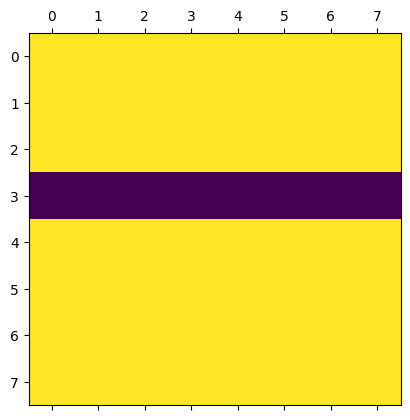

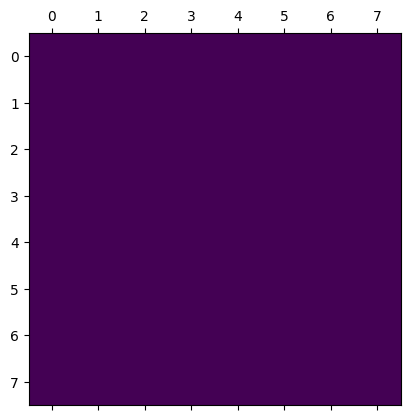

In [4]:
def test(th = 2):
	result = []
	for i in range(len(neuron1)):
		result.append(1) if (w[i]@loop(neuron1, w)[i]) > th else result.append(-1)
	return result

print(test())

mp.matshow(neuron1)
mp.matshow(neuron1*loop(weights(x1), w))
mp.show()